<a href="https://colab.research.google.com/github/Jonher0100/Food-sales/blob/main/Jonathan_Hernandez_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1 - Food Sales

Jonathan Hernandez





# *Loading* Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from matplotlib.ticker import FuncFormatter
filename = '/content/drive/MyDrive/Copy of sales_predictions - sales_predictions.csv'

In [2]:
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Dictionary

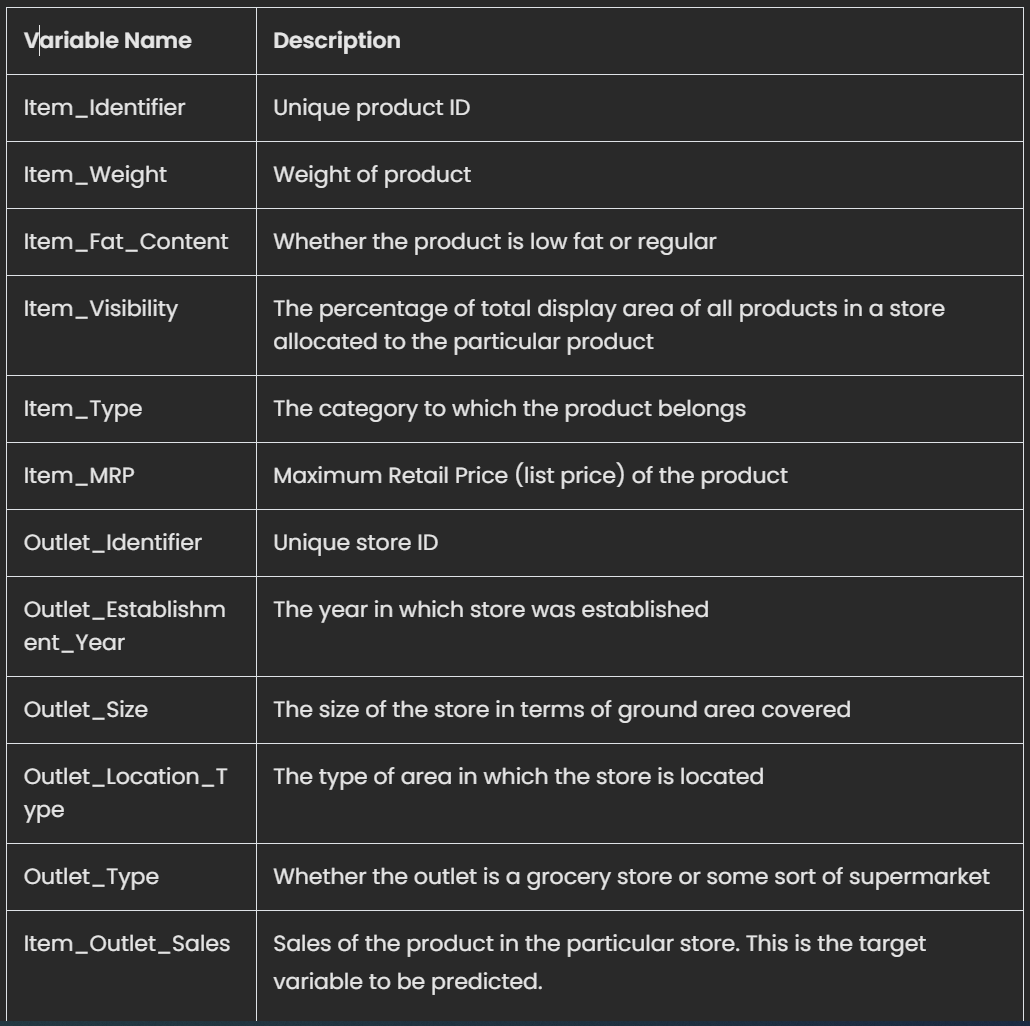

# Data Cleaning

How many rows and columns?

In [3]:
df.shape

(8523, 12)

What are the datatypes of each variable?

In [4]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Are there any duplicates? If so, drop any duplicates.

In [5]:
dupli = df.duplicated().sum()
print(f"There are {dupli} duplicates in the dataset.")

There are 0 duplicates in the dataset.


Identify missing values.

In [6]:
miss_val = df.isna().sum()
miss_val

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Percentage of missing values.

In [9]:
# Calculating the percentage of missing values in Item Weight
missing_item_weight = miss_val.loc["Item_Weight"]
miss_percent_weight = (((missing_item_weight) / (df.shape[0])*100)).round(2)
print(f"There are {missing_item_weight} missing values in the Item_Weight column, represents {miss_percent_weight}% of missing values.") 

There are 1463 missing values in the Item_Weight column, represents 17.17% of missing values.


In [10]:
# Calculating the percentage of missing values in Outlet Size
missing_outlet_size = miss_val.loc['Outlet_Size']
missing_outlet_percentage = (((missing_outlet_size) / (df.shape[0])*100)).round(2)
print(f"There are {missing_outlet_size} missing values in the Item_Weight column, represents {missing_outlet_percentage}% of missing values.")

There are 2410 missing values in the Item_Weight column, represents 28.28% of missing values.


-Missing values are under 50% so I will not delete any.

-I will not delete any rows as well since there would be around 2 missing.

-Imputate missing values for both columns.

First Item Weight


In [11]:
#Item_Weight missing values
#loop through all rows in df
for index in df.index: 

#Only filter for items that Item_Idenitifer matches the currect row
 item_id_filter = df['Item_Identifier'] == df.loc[index, 'Item_Identifier']

#find the mean
 item_weight_mean = df.loc[item_id_filter, 'Item_Weight'].mean()

#Make the mean equal the Item Weight column
 df.loc[index, 'Item_Weight'] = item_weight_mean

In [12]:
#check for impute
df.isna().sum()['Item_Weight']

4

In [13]:
#What are the remaining missing items in Item Weight
filter_df = df[df['Item_Weight'].isna()]
filter_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [14]:
#confirmation for Item)_Identifiers only appear one time
for index , row in filter_df.iterrows():
  Identi = row['Item_Identifier']
  numb = df['Item_Identifier'].value_counts()[Identi]
  print(f"Item_Idenitifer {Identi} appears in dataset {numb} time(s)")

Item_Idenitifer FDN52 appears in dataset 1 time(s)
Item_Idenitifer FDK57 appears in dataset 1 time(s)
Item_Idenitifer FDE52 appears in dataset 1 time(s)
Item_Idenitifer FDQ60 appears in dataset 1 time(s)


In [15]:
# Setting the average Item Weight
for index, row in filter_df .iterrows():
 df.loc[index, 'Item_Weight'] = df['Item_Weight'].mean()

In [16]:
# Check for impute
df.isna().sum()['Item_Weight']

0

Outlet value

In [17]:
#missing Outlet Values
#loop through rows
for index in df.index:
# Creating a filter that loop that matches the row
 outlet_id_filter = df['Outlet_Identifier'] == df.loc[index, 'Outlet_Identifier']
# Calculate the Item Weight in the filter
 outlet_mean = df.loc[outlet_id_filter, 'Outlet_Size'].min()
# assign to column
 df.loc[index, 'Outlet_Size'] = outlet_mean

In [18]:
#check for impute
df.isna().sum()['Outlet_Size']

2410

In [19]:
## Every outlet is different so their outlet size is unknown
df['Outlet_Size'].fillna('Unknown', inplace = True)

In [20]:
#Check Outlet Size Impute
df.isna().sum()['Outlet_Size']

0

Confirm no missing values

In [21]:
#Confirm that there are no missing values after addressing them
missing_val = df.isna().sum().sum()

print(f"There are {missing_val} values missing remaining.")

There are 0 values missing remaining.


Finding and fixing inconsistent values

In [22]:
#Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)
df.describe(include = 'object').round(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,5,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [23]:
#creating object columns
dtypes =df.dtypes 
dtypes_objects = dtypes[dtypes == "object"]
dtypes_objects

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [24]:
#print out the object type columns to check inconsistent names
for column in dtypes_objects.index:

 print(column)
 print(df[column].unique())  
 print("")

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Outlet_Size
['Medium' 'Unknown' 'High' 'Small']

Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']

Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



In [25]:
# how many items in each object category 
for column in dtypes_objects.index:
  print(column)
  print(df[column].value_counts())
  print("")

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
O

In [30]:
#fixing Item_Fat_Content to make them consistent
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low', 'Low Fat')

In [31]:
#print results
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    3006
low fat     112
Name: Item_Fat_Content, dtype: int64

In [32]:
#fixing the values
df['Outlet_Size'] = df['Outlet_Size'].replace('High', 'Large')

#Checking the results
df["Outlet_Size"].value_counts()

Medium     2793
Unknown    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64

In [33]:
#For any numerical columns, obtain the summary statistics of each (min, max, mean).

df.describe(include = 'number').round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.88,0.07,140.99,1997.83,2181.29
std,4.65,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.78,0.03,93.83,1987.00,834.25
50%,12.65,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


# Exploratory Visuals

For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:




In [34]:
# Displaying various features in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Histogram to view the distributions of various features in your dataset.

Text(0.5, 1.0, 'Histogram Showing the Item Weight')

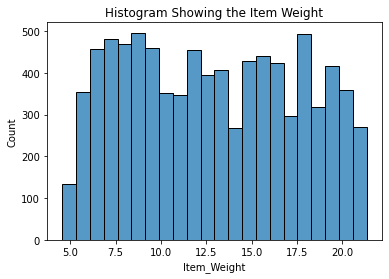

In [40]:
# Creating a histogram with seaborn
ax = sns.histplot(data = df, x = 'Item_Weight')
# Setting a title for our Histogram
ax.set_title('Histogram Showing the Item Weight')

Boxplot to view statistical summaries of various features in your dataset.


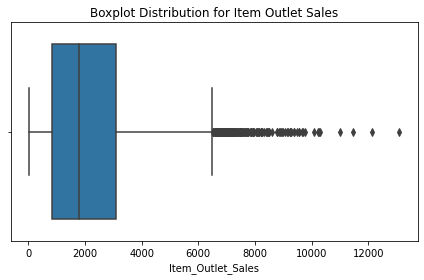

In [47]:
# Creating a boxplot using the Item outlet sales with seaborn
ax = sns.boxplot(x= 'Item_Outlet_Sales', data = df)
# Set the title
ax.set_title('Boxplot Distribution for Item Outlet Sales')
# Tighten up the boxplot
plt.tight_layout();

Printing out the date to compare to our boxplot.

In [41]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

Heatmap of the correlation between features.

<Axes: >

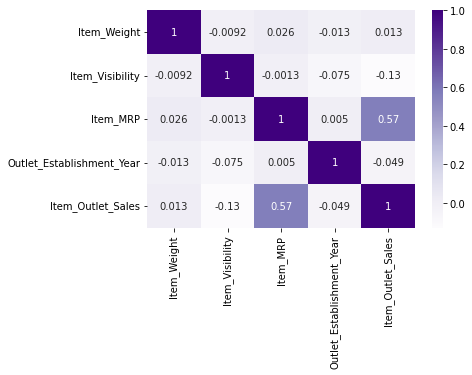

In [53]:
# Creating a Correlation for the columns with numbers
corr = df.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True)

# Explanatory Visuals